In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [2]:
page = 1
skills = list()
while page <= 50:
    url = f"https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=Data%20science&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=data%20science&pDate=I&sequence={page}&startPage=1"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    for span in soup.find_all("span", class_="srp-skills"):
        skills.append(span.get_text(strip=True))
    page += 1

In [3]:
skills_df = pd.DataFrame({"Raw Skills":skills})

In [4]:
for i in range(5):
    if skills_df["Raw Skills"][i] is ".":
        skills_df.drop(i, axis=0, inplace=True)
skills_df.reset_index(drop=True, inplace=True)

In [5]:
for i in range(len(skills_df)):
    skills_df["Python Skills"] = skills_df["Raw Skills"].str.contains("pyt", "Pyt")

In [6]:
skills_df["Python Skills"].value_counts()

False    1006
True      241
Name: Python Skills, dtype: int64

In [7]:
for i in range(len(skills_df)):
    skills_df["R Skills"] = skills_df["Raw Skills"].str.contains("R ", "R,")

In [8]:
skills_df["R Skills"]

0       False
1       False
2       False
3       False
4       False
        ...  
1242    False
1243    False
1244    False
1245    False
1246    False
Name: R Skills, Length: 1247, dtype: bool

In [9]:
skills_df["R Skills"].value_counts()

False    1218
True       29
Name: R Skills, dtype: int64

In [10]:
skills_df

,Raw Skills,Python Skills,R Skills
0,"sql ,datascience, use cases ,dataanalytics ...",False,False
1,"datagathering ,datamodels , Develop customd...",False,False
2,"python , c , machine learning , bigdata",True,False
3,"algorithms , python , rdbms , sas , sc...",True,False
4,"ds , bigdata, python , impala , hive ,...",True,False
...,...,...,...
1242,Internet Applications,False,False
1243,Vacancy fordataentry work,False,False
1244,"DataEntry , computer operator , office ass...",False,False
1245,"Implementation , Development , Drivelines ...",False,False


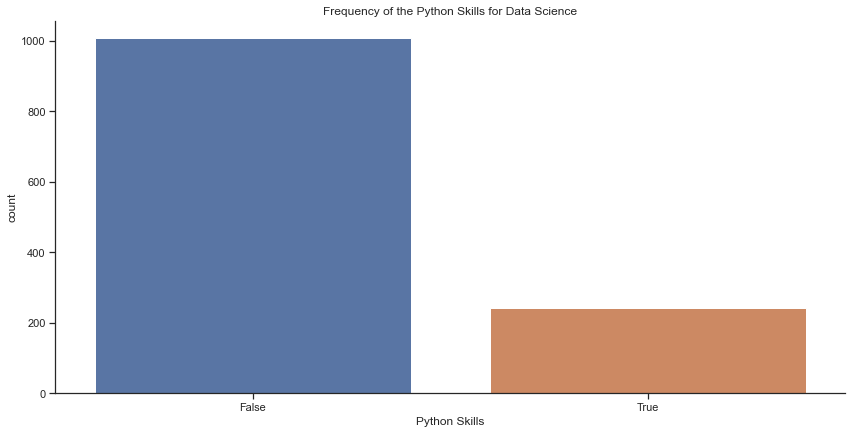

In [11]:
#Countplot showing the freqency of Python Skills for Data Science
python_count = sns.catplot(x="Python Skills", kind="count", height=6, aspect=2, data=skills_df)
plt.title("Frequency of the Python Skills for Data Science")
plt.show()
python_count.savefig("python_count.png")

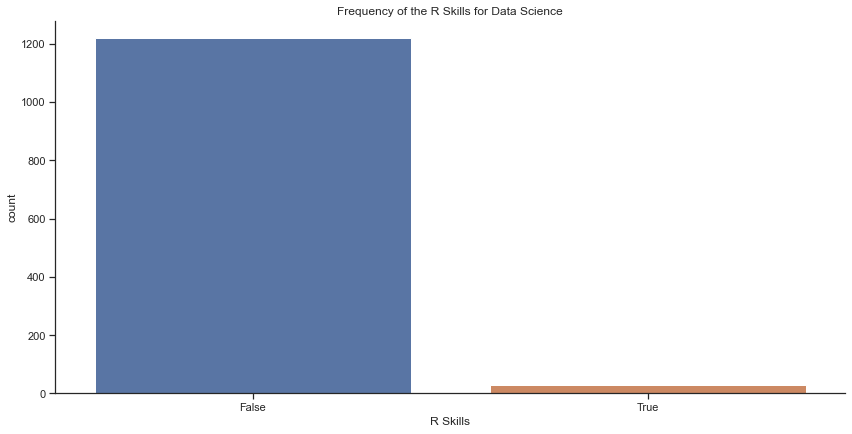

In [12]:
#Countplot showing the freqency of R Skills for Data Science
r_count = sns.catplot(x="R Skills", kind="count", height=6, aspect=2, data=skills_df)
plt.title("Frequency of the R Skills for Data Science")
plt.show()
r_count.savefig("r_count.png")